# Individual Survival Regression (Cox Proportional Hazard)

The Cox (proportional hazard) model is one of the most popular models combining the covariates (features) and the general survival function (as calculated in nb 1) to estimate survival functions on the individual level. It is implemented using David Camerons [lifelines package](https://lifelines.readthedocs.io/en/latest/index.html).


The **idea behind the model** is that the log-hazard of an individual is a linear function of their static covariates, and a population-level baseline hazard that changes over time.** (Assumptions: The Cox model assumes that the covariates have a linear multiplication eﬀect on the hazard function and the eﬀect stays the same across time.)

This notebooks owes very much to this [blogpost](https://towardsdatascience.com/survival-analysis-intuition-implementation-in-python-504fde4fcf8e) from Anurag Pandey, that also gives some nice additional explanations. 


### Data Sources

- `data/interim/telco_customer_churn.csv`: Cleaned set with telco customer data, as prepared in nb 1.

### Changes

- 2019-02-22: Start and terminate notebook

---

### Import libraries, load data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from tqdm import tqdm

from lifelines.plotting import plot_lifetimes
from lifelines import CoxPHFitter

# My functions
import EDA_functions as EDA
import cleaning_functions as cleaning

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
color = 'rebeccapurple'
%matplotlib inline

# Display settings
from IPython.display import Image # for image towards the end
from IPython.display import display
pd.options.display.max_columns = 100

In [2]:
# Load data 
data = pd.read_csv('data/interim/telco_customer_churn.csv')

### Prepare the data

For a demonstration of the package it is more convenient to work with only a subset of the features.

In [3]:
cox_data = data[['tenure','Churn','gender','Partner','Dependents',
                 'PhoneService','MonthlyCharges','SeniorCitizen','StreamingTV']]

In [4]:
# Dummy the data
cox = pd.get_dummies(cox_data, drop_first=True)

In [5]:
# Check results
display(cox.head())

,tenure,Churn,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
0,1,0,29.85,0,0,1,0,0,0,0
1,34,0,56.95,0,1,0,0,1,0,0
2,2,1,53.85,0,1,0,0,1,0,0
3,45,0,42.30,0,1,0,0,0,0,0
4,2,1,70.70,0,0,0,0,1,0,0


## Fit Cox Proportional Hazards Model


In [6]:
cph = CoxPHFitter()
cph.fit(cox, 'tenure', event_col='Churn')  
# Have a look at the significance of the features
cph.print_summary()    

<lifelines.CoxPHFitter: fitted with 7043 observations, 5174 censored>
      duration col = 'tenure'
         event col = 'Churn'
number of subjects = 7043
  number of events = 1869
    log-likelihood = -15182.39
  time fit was run = 2019-02-22 12:44:10 UTC

---
                                 coef  exp(coef)  se(coef)      z      p  -log2(p)  lower 0.95  upper 0.95
MonthlyCharges                  -0.01       0.99      0.00  -6.13 <0.005     30.06       -0.01       -0.01
SeniorCitizen                    0.40       1.49      0.06   7.16 <0.005     40.15        0.29        0.50
gender_Male                     -0.01       0.99      0.05  -0.23   0.82      0.29       -0.10        0.08
Partner_Yes                     -0.81       0.45      0.05 -14.93 <0.005    164.98       -0.92       -0.70
Dependents_Yes                  -0.36       0.70      0.07  -5.21 <0.005     22.37       -0.49       -0.22
PhoneService_Yes                 0.69       2.00      0.10   6.65 <0.005     34.96        0.49  

**Observation:** `gender_Male` is not significant. All other features / covariates are (with CI 95%)

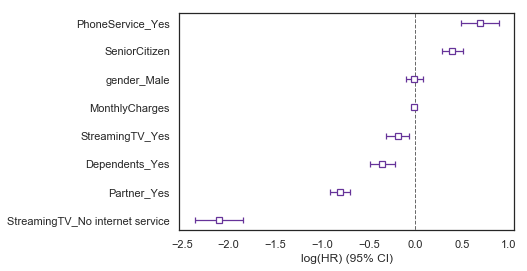

In [7]:
# Plot results
cph.plot(c=color);

## Display Survival Curves on individual level

In [8]:
# Select 5 customers (rows 5 till 9) for demonstration purposes
individuals = cox.iloc[5:10, 2:]
(display(individuals))

,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
5,99.65,0,0,0,0,1,0,1
6,89.10,0,1,0,1,1,0,1
7,29.75,0,0,0,0,0,0,0
8,104.80,0,0,1,0,1,0,1
9,56.15,0,1,0,1,1,0,0


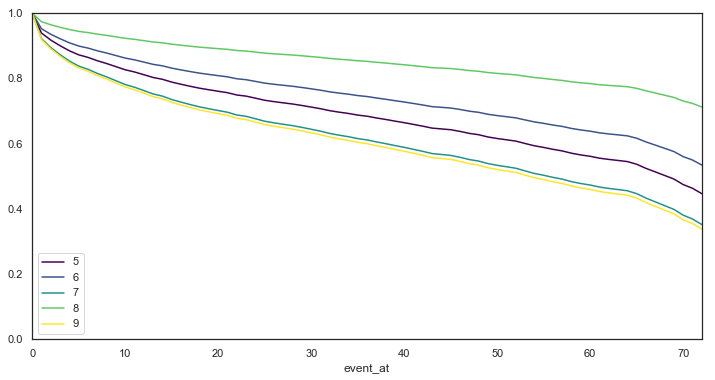

In [9]:
# Predict the survival curve for the selected customers
cph.predict_survival_function(individuals).plot(figsize=(12,6), ylim=(0,1), cmap='viridis');

(Note: the x-axis is limited by the max tenure in the dataset)

---